In [10]:
import numpy as np
import matplotlib.pyplot as plt

def euclideanDistance(x, y):
    squared_d = 0
    for i in range(len(x)):
        squared_d += (x[i] - y[i])**2
    d = np.sqrt(squared_d)
    return d

class k_medoids:
    def __init__(self, k = 2, max_iter = 300, has_converged = False):
        self.k = k
        self.max_iter = max_iter
        self.has_converged = has_converged
        self.medoids_cost = []
        
    def initMedoids(self, X):
        self.medoids = []
        indexes = np.random.randint(0, len(X)-1,self.k)
        self.medoids = X[indexes]
        for i in range(0,self.k):
            self.medoids_cost.append(0)
            
    def isConverged(self, new_medoids):
        return set([tuple(x) for x in self.medoids]) == set([tuple(x) for x in new_medoids])  
   
    def fit(self, X):
        self.initMedoids(X)
        
        for i in range(self.max_iter):
            cur_labels = []
            for medoid in range(0,self.k):
                self.medoids_cost[medoid] = 0
                for k in range(len(X)):
                    d_list = []                    
                    for j in range(0,self.k):
                        d_list.append(euclideanDistance(self.medoids[j], X[k]))
                    cur_labels.append(d_list.index(min(d_list)))
                    self.medoids_cost[medoid] += min(d_list)         
            self.updateMedoids(X, cur_labels)
            if self.has_converged:
                break
        cost=0
        for i in range(0,self.k):
            cost+=self.medoids_cost[i]
        return np.array(self.medoids) ,cost
    
    def updateMedoids(self, X, labels):

        self.has_converged = True
        clusters = []
        for i in range(0,self.k):
            cluster = []
            for j in range(len(X)):
                if (labels[j] == i):
                    cluster.append(X[j])
            clusters.append(cluster)
        new_medoids = []
        for i in range(0, self.k):
            new_medoid = self.medoids[i]
            old_medoids_cost = self.medoids_cost[i]
            for j in range(len(clusters[i])):
                
                cur_medoids_cost = 0
                for dpoint_index in range(len(clusters[i])):
                    cur_medoids_cost += euclideanDistance(clusters[i][j], clusters[i][dpoint_index])
                
                if cur_medoids_cost < old_medoids_cost:
                    new_medoid = clusters[i][j]
                    old_medoids_cost = cur_medoids_cost
            
            new_medoids.append(new_medoid)
        if not self.isConverged(new_medoids):
            self.medoids = new_medoids
            self.has_converged = False
        

In [4]:
X=np.array([[100,5],[90,7],[15,96],[20,105],[85,12],[18,110]])

In [15]:
x=[]
y=[]

In [16]:
for i in range(1,X.shape[0]+1):
    k=k_medoids(k=i)
    a,cost=k.fit(X)
    y.append(cost)
    x.append(i)

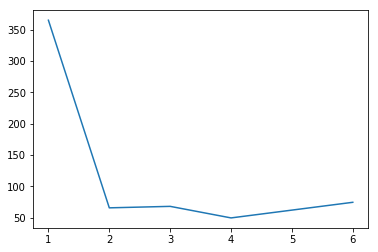

In [17]:
plt.plot(x,y)